# 1) Data Preprocessing
---

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling1D ,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPool1D, Embedding
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('/content/spam.csv', encoding= 'ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# delete garbage columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns 
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
y = df['b_labels'].values

In [10]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['data'], y, test_size = 0.33)

In [11]:
# Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(X_train)
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test  = tokenizer.texts_to_sequences(X_test)

In [16]:
len(sequences_train[0])

25

In [14]:
# Check word index mapping (to check the nımber of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print("Total number of unique tokens are %s" %V)

Total number of unique tokens are 7294


In [17]:
# pada sequences to get N * T matrix
data_train = pad_sequences(sequences_train)
print("Shape of data train tensor:", data_train.shape)

Shape of data train tensor: (3733, 189)


In [18]:
# Set the value of t to get sequence length
T = data_train.shape[1]

In [19]:
print(T)

189


In [20]:
# Pad the test set
data_test = pad_sequences(sequences_test, maxlen = T)
# maxlen = T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [21]:
data_train[0]
len(data_train[0])

189

# 2) Building The Model
---

In [27]:
# Create the model

# Choose embedding dimensionality
D = 20 # this is a hyper parameter, we can choose any word vector size that we want

# Input layer
i = Input(shape = (T,)) # input layer takes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(V+1, D)(i) #This takes in sequences of integers and returns sequences 
# ıf word vectors
# this will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

# first cnn layer
x = Conv1D(32, 3, activation = 'relu')(x)
x = MaxPool1D(3)(x)

# second cnn layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPool1D()(x)

# third cnn layer
x = Conv1D(128, 3, activation= 'relu')(x)
x = GlobalMaxPooling1D()(x)

# dense layer
x = Dense(1, activation= 'sigmoid')(x)

model = Model(i, x)

In [29]:
# compile the model
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
# Train the model
r = model.fit(x=data_train, y = y_train, epochs = 5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 3s 24ms/step - loss: 0.4024 - accuracy: 0.8556 - val_loss: 0.2816 - val_accuracy: 0.8755
Epoch 2/5
117/117 [==============================] - 2s 21ms/step - loss: 0.1202 - accuracy: 0.9512 - val_loss: 0.0664 - val_accuracy: 0.9859
Epoch 3/5
117/117 [==============================] - 2s 21ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0705 - val_accuracy: 0.9869
Epoch 4/5
117/117 [==============================] - 2s 21ms/step - loss: 0.0045 - accuracy: 0.9989 - val_loss: 0.0913 - val_accuracy: 0.9848
Epoch 5/5
117/117 [==============================] - 2s 21ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0789 - val_accuracy: 0.9848


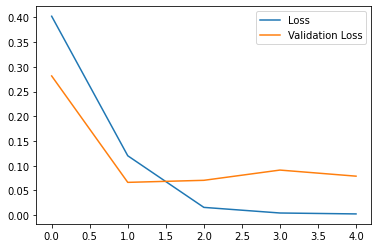

In [31]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

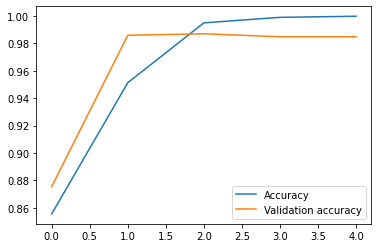

In [32]:
# accuracy per iteration
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.show()